# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q={}&appid={}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(city, weather_api_key)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Request weather data
        response = requests.get(city_url)
        

        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Create a DataFrame from the city_data list
city_data_df = pd.DataFrame(city_data)

# Display the DataFrame
city_data_df.head()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | polyarnyy
Processing Record 2 of Set 1 | kharkhorin
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | nurota
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | tingo maria
Processing Record 9 of Set 1 | ulsteinvik
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | kone
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | pathein
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | owase
Processing Record 18 of Set 1 | afaahiti
Processing Record 19 of Set 1 | euclides da cunha
Processing Record 20 of Set 1 | mizdah
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | kiruna
Processin

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,polyarnyy,69.1989,33.4478,277.24,66,82,9.02,RU,1728840115
1,kharkhorin,47.1975,102.8238,271.17,86,99,3.03,MN,1728840117
2,stanley,54.8680,-1.6985,279.55,72,0,0.51,GB,1728840118
3,nurota,40.5614,65.6886,283.94,81,23,0.56,UZ,1728840050
4,edinburgh of the seven seas,-37.0676,-12.3116,287.03,75,90,9.67,SH,1728840120


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
print(city_data_df)

                            City      Lat       Lng  Max Temp  Humidity  \
0                      polyarnyy  69.1989   33.4478    277.24        66   
1                     kharkhorin  47.1975  102.8238    271.17        86   
2                        stanley  54.8680   -1.6985    279.55        72   
3                         nurota  40.5614   65.6886    283.94        81   
4    edinburgh of the seven seas -37.0676  -12.3116    287.03        75   
..                           ...      ...       ...       ...       ...   
570                      omaruru -21.4333   15.9333    300.97        25   
571                       rudbar  30.1500   62.6000    300.77        10   
572                   jeanerette  29.9110  -91.6635    301.16        50   
573                      wynyard -41.0000  145.7167    284.92        83   
574                ponta delgada  37.7333  -25.6667    296.55        94   

     Cloudiness  Wind Speed Country        Date  
0            82        9.02      RU  1728840115  

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,polyarnyy,69.1989,33.4478,277.24,66,82,9.02,RU,1728840115
1,kharkhorin,47.1975,102.8238,271.17,86,99,3.03,MN,1728840117
2,stanley,54.8680,-1.6985,279.55,72,0,0.51,GB,1728840118
3,nurota,40.5614,65.6886,283.94,81,23,0.56,UZ,1728840050
4,edinburgh of the seven seas,-37.0676,-12.3116,287.03,75,90,9.67,SH,1728840120


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,polyarnyy,69.1989,33.4478,277.24,66,82,9.02,RU,1728840115
1,kharkhorin,47.1975,102.8238,271.17,86,99,3.03,MN,1728840117
2,stanley,54.8680,-1.6985,279.55,72,0,0.51,GB,1728840118
3,nurota,40.5614,65.6886,283.94,81,23,0.56,UZ,1728840050
4,edinburgh of the seven seas,-37.0676,-12.3116,287.03,75,90,9.67,SH,1728840120


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

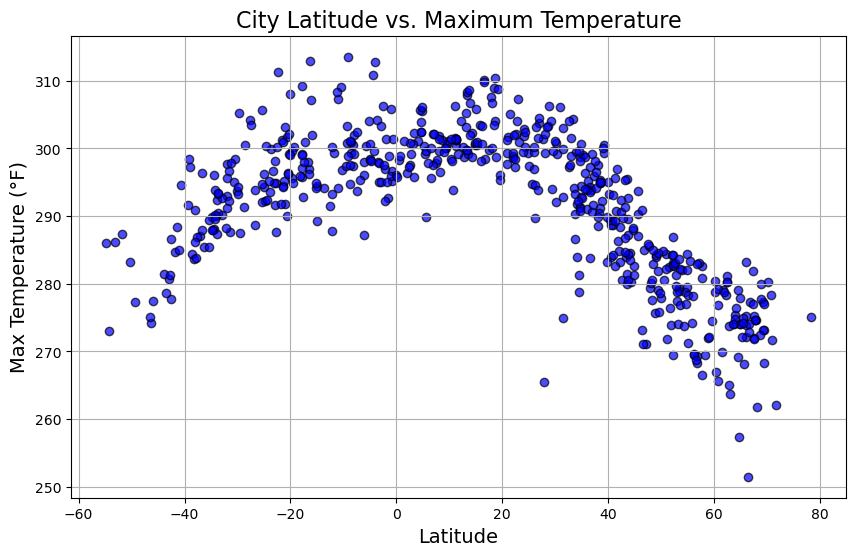

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('City Latitude vs. Maximum Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (°F)', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

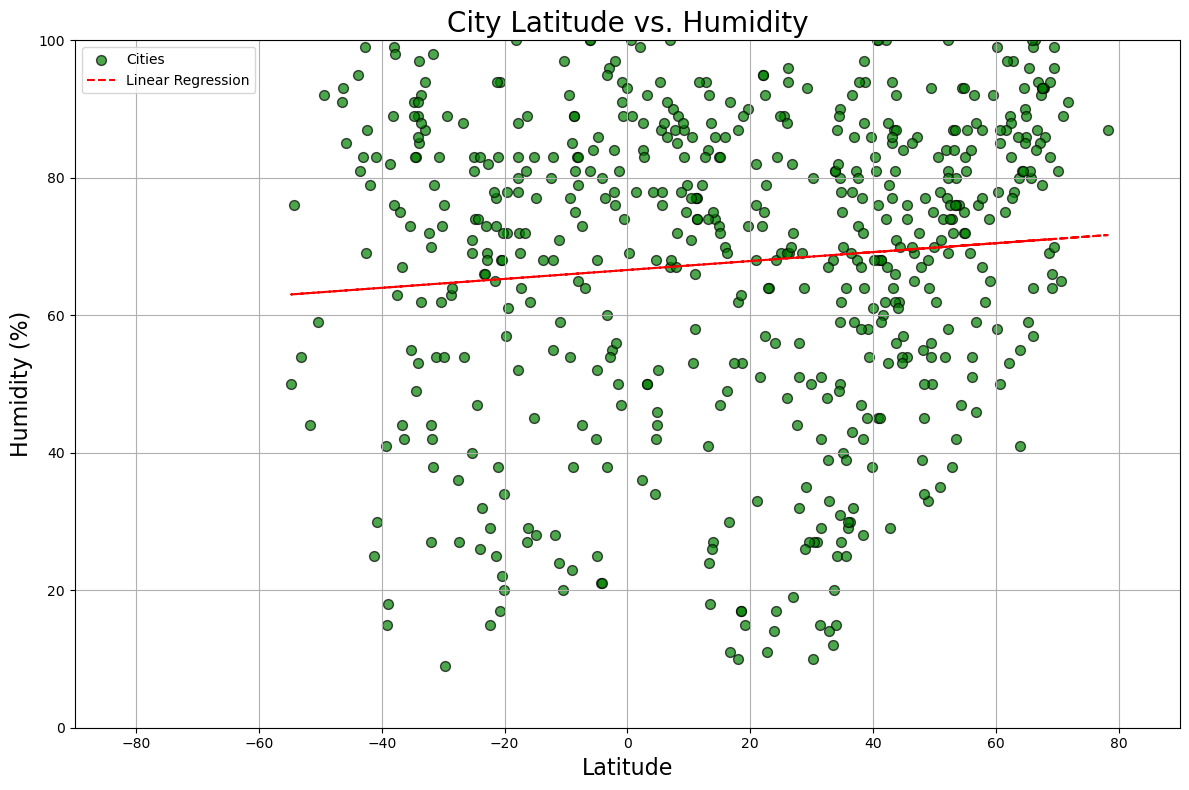

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(12, 8))

# Scatter plot with additional properties
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Humidity'], 
    color='green', 
    edgecolor='black', 
    alpha=0.7, 
    s=50,  # Size of markers
    label='Cities'
)

# Incorporate the other graph properties
# Calculate and plot a linear regression line if desired
slope, intercept, r_value, p_value, std_err = linregress(city_data_df['Lat'], city_data_df['Humidity'])
regression_line = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], regression_line, color='red', linestyle='--', label='Linear Regression')

# Add title and labels
plt.title('City Latitude vs. Humidity', fontsize=20)
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Humidity (%)', fontsize=16)
plt.xlim(-90, 90)  # Set x-axis limits
plt.ylim(0, 100)  # Set y-axis limits to percentage range
plt.grid(True)

# Add a legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.tight_layout() 
plt.show()

#### Latitude Vs. Cloudiness

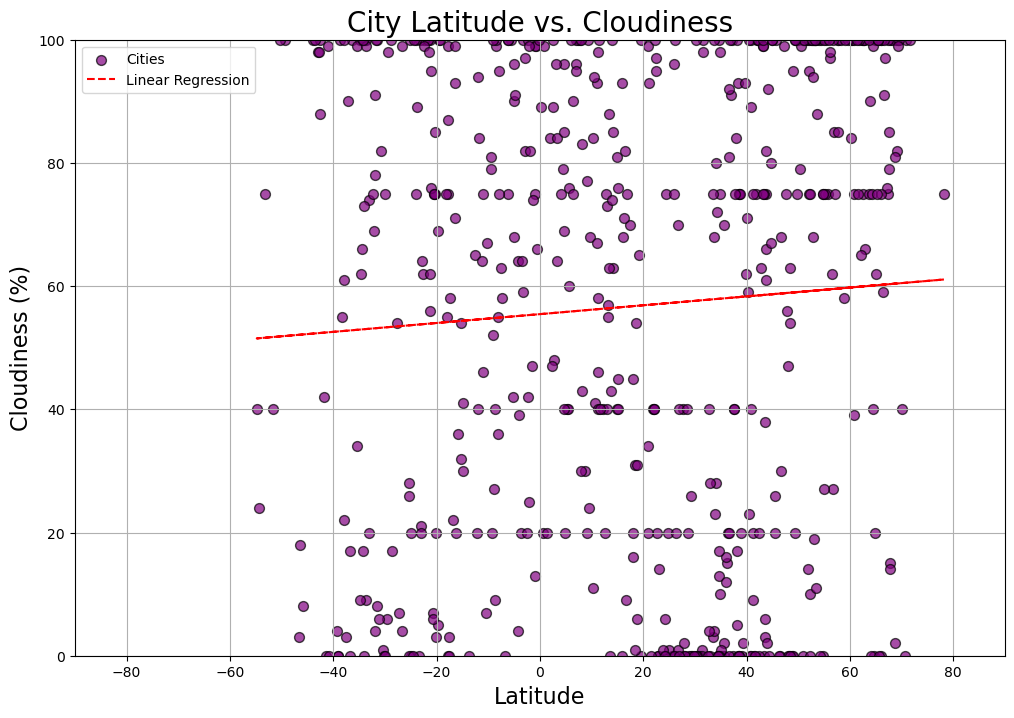

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(12, 8))

# Scatter plot with additional properties
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Cloudiness'], 
    color='purple', 
    edgecolor='black', 
    alpha=0.7, 
    s=50,  # Size of markers
    label='Cities'
)
# Incorporate the other graph properties
slope, intercept, r_value, p_value, std_err = linregress(city_data_df['Lat'], city_data_df['Cloudiness'])
regression_line = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], regression_line, color='red', linestyle='--', label='Linear Regression')

# Add title and labels
plt.title('City Latitude vs. Cloudiness', fontsize=20)
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Cloudiness (%)', fontsize=16)
plt.xlim(-90, 90)  # Set x-axis limits
plt.ylim(0, 100)  # Set y-axis limits to percentage range
plt.grid(True)

# Add a legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

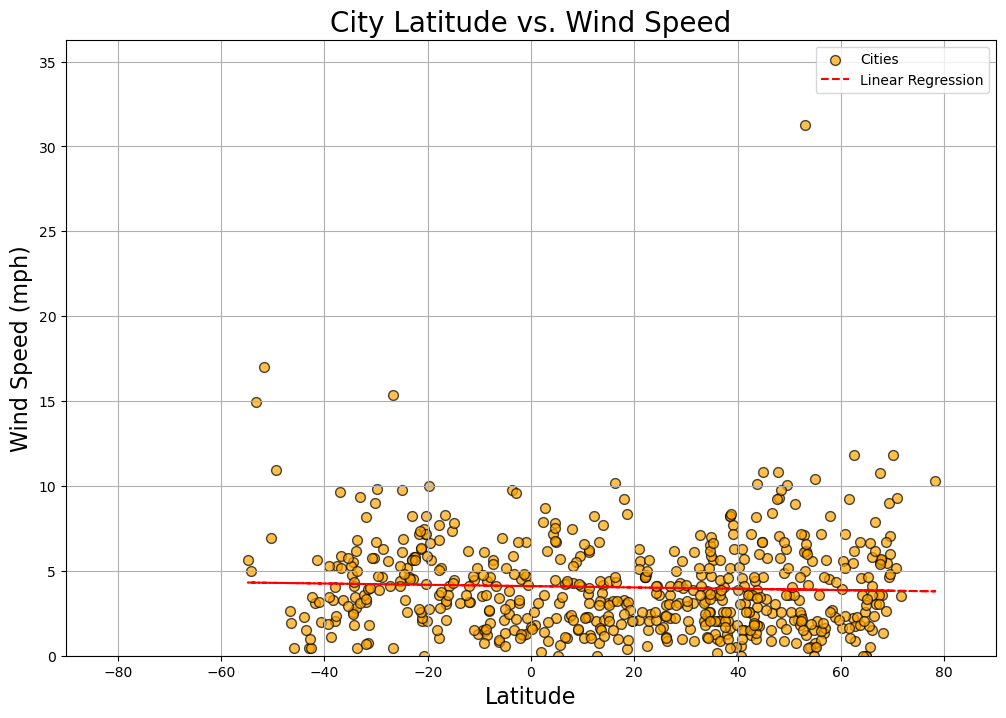

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(12, 8))

# Scatter plot with additional properties
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Wind Speed'], 
    color='orange', 
    edgecolor='black', 
    alpha=0.7, 
    s=50,  # Size of markers
    label='Cities'
)

# Incorporate the other graph properties
slope, intercept, r_value, p_value, std_err = linregress(city_data_df['Lat'], city_data_df['Wind Speed'])
regression_line = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], regression_line, color='red', linestyle='--', label='Linear Regression')

# Add title and labels
plt.title('City Latitude vs. Wind Speed', fontsize=20)
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Wind Speed (mph)', fontsize=16)
plt.xlim(-90, 90)  # Set x-axis limits
plt.ylim(0, max(city_data_df['Wind Speed']) + 5)  # Set y-axis limits dynamically
plt.grid(True)

# Add a legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, color='blue'):
    
    # Create the scatter plot
    plt.figure(figsize=(12, 8))
    plt.scatter(x_values, y_values, color=color, edgecolor='black', alpha=0.7, s=50, label='Cities')

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Plot the linear regression line
    plt.plot(x_values, regression_line, color='red', linestyle='--', label=f'Linear Regression (R²={r_value**2:.2f})')

    # Add labels, title, and grid
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.title(title, fontsize=20)
    plt.grid(True)

    # Add legend
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,polyarnyy,69.1989,33.4478,277.24,66,82,9.02,RU,1728840115
1,kharkhorin,47.1975,102.8238,271.17,86,99,3.03,MN,1728840117
2,stanley,54.8680,-1.6985,279.55,72,0,0.51,GB,1728840118
3,nurota,40.5614,65.6886,283.94,81,23,0.56,UZ,1728840050
8,ulsteinvik,62.3432,5.8487,280.24,89,100,2.24,NO,1728840124


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] >= 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,polyarnyy,69.1989,33.4478,277.24,66,82,9.02,RU,1728840115
1,kharkhorin,47.1975,102.8238,271.17,86,99,3.03,MN,1728840117
2,stanley,54.8680,-1.6985,279.55,72,0,0.51,GB,1728840118
3,nurota,40.5614,65.6886,283.94,81,23,0.56,UZ,1728840050
8,ulsteinvik,62.3432,5.8487,280.24,89,100,2.24,NO,1728840124


###  Temperature vs. Latitude Linear Regression Plot

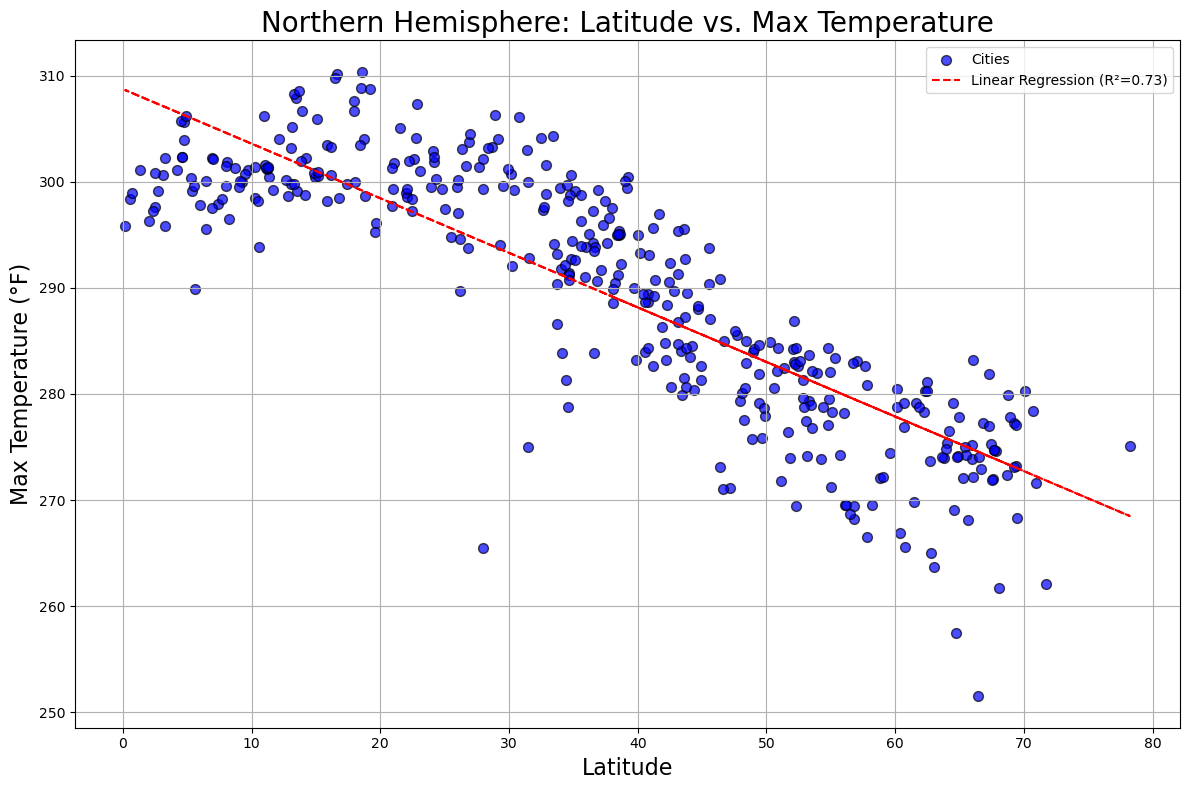

In [15]:
# Linear regression on Northern Hemisphere
# Plot Latitude vs. Max Temperature with regression line
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temperature (°F)', 
                       'Northern Hemisphere: Latitude vs. Max Temperature', color='blue')

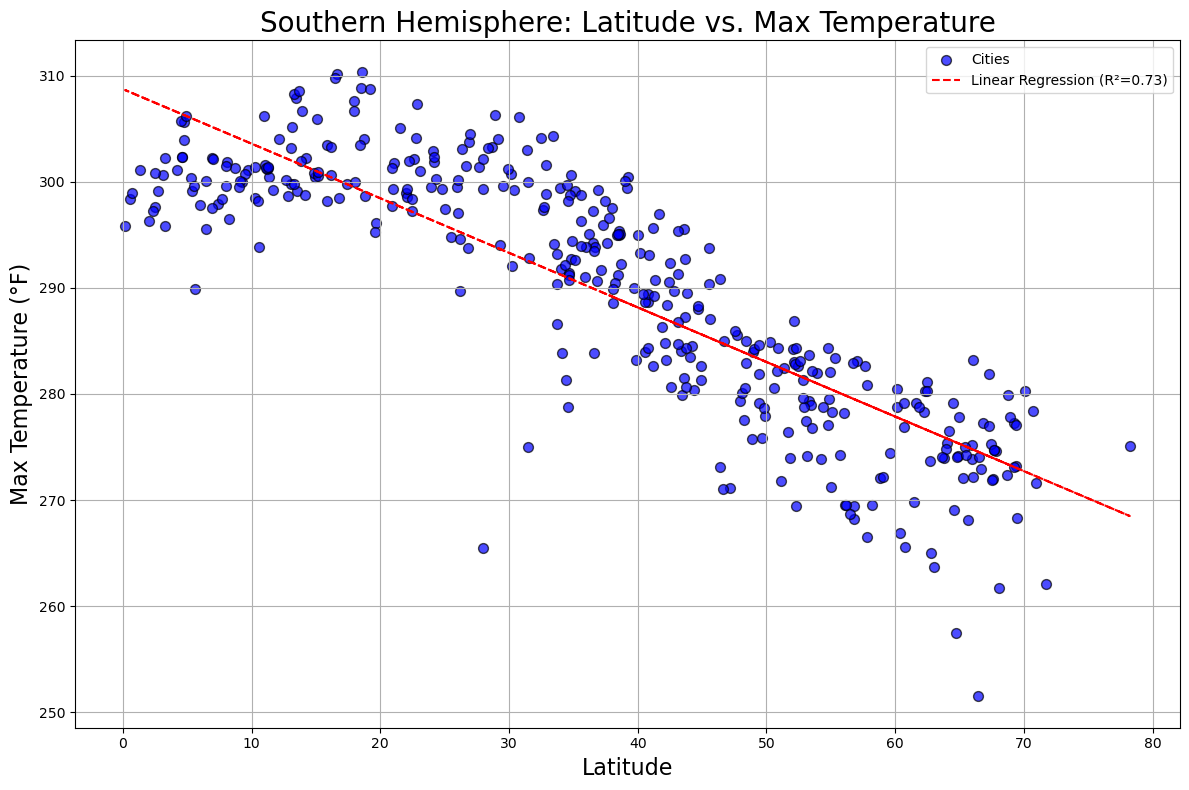

In [16]:
# Linear regression on Southern Hemisphere
# Plot Latitude vs. Max Temperature with regression line for the Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temperature (°F)', 
                       'Southern Hemisphere: Latitude vs. Max Temperature', color='blue')

**Discussion about the linear relationship:a negative relationship between latitude and temperature. For btoh Northern and southern 

### Humidity vs. Latitude Linear Regression Plot

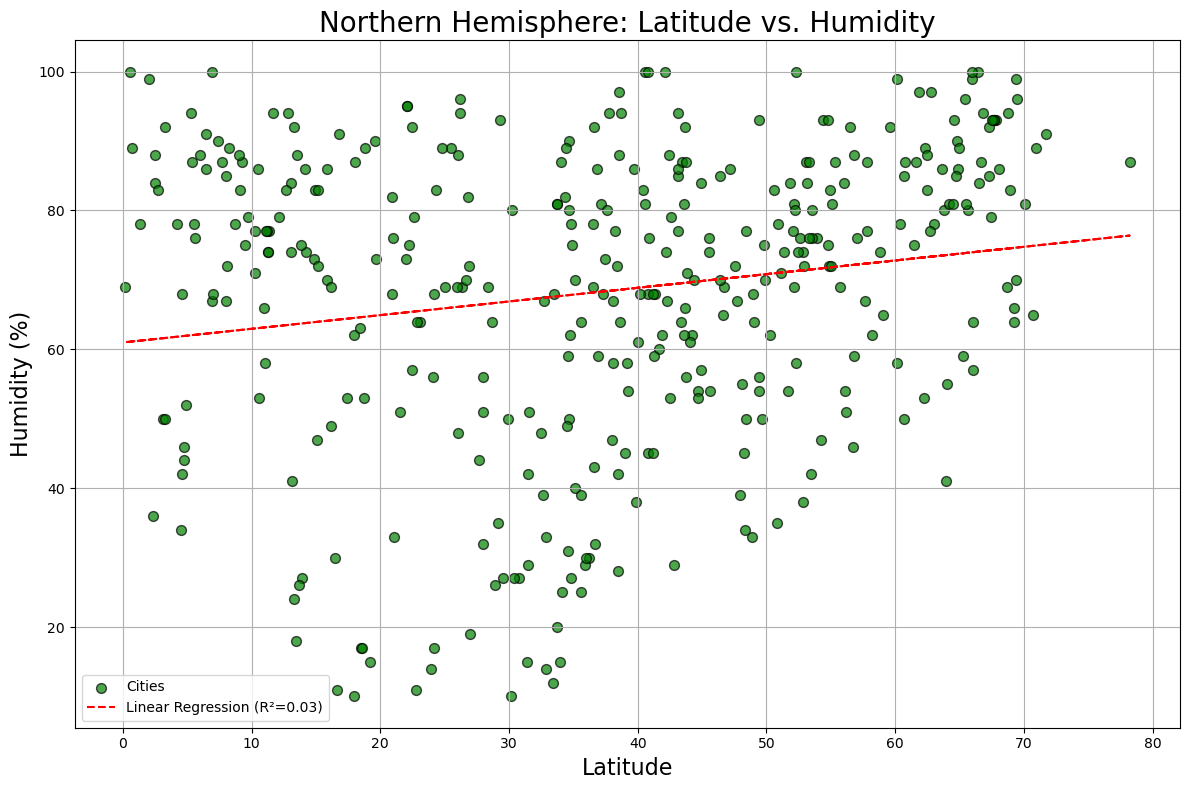

In [17]:
# Northern Hemisphere
# Perform and plot linear regression for Latitude vs. Humidity in the Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Northern Hemisphere: Latitude vs. Humidity', color='green')

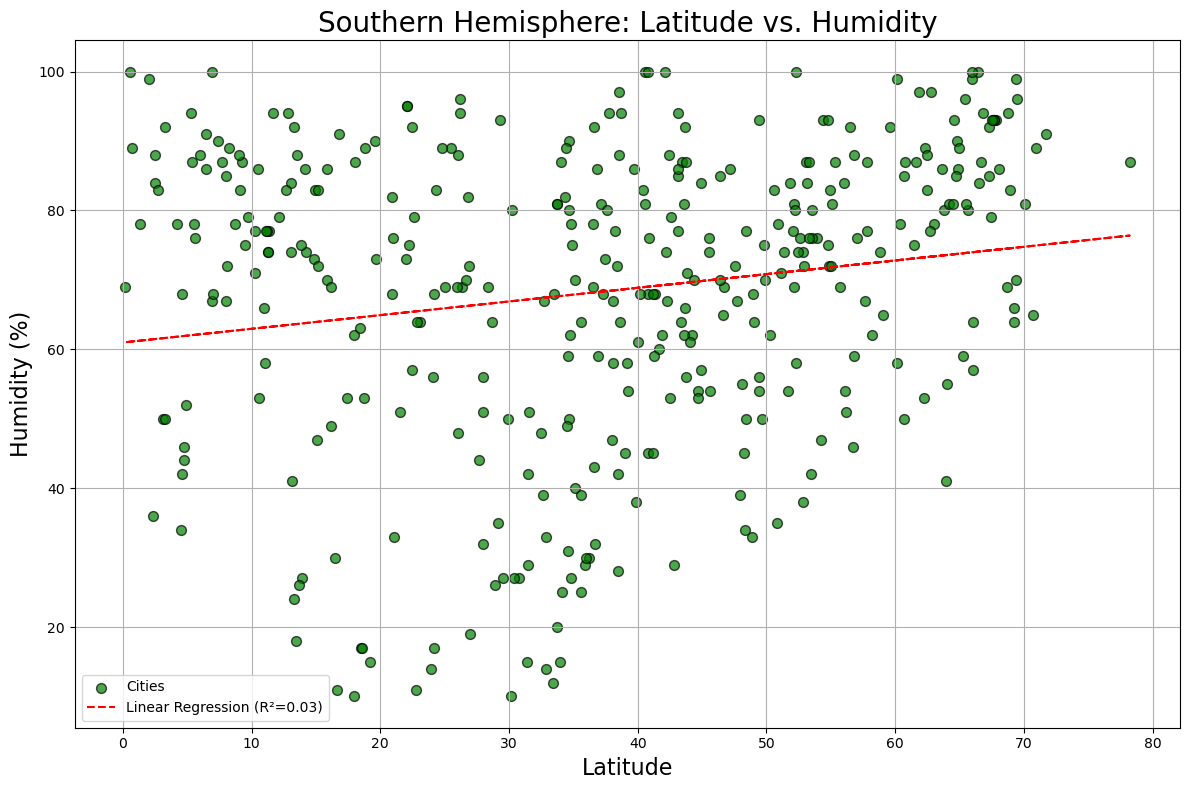

In [18]:
# Southern Hemisphere
# Perform and plot linear regression for Latitude vs. Humidity in the Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Southern Hemisphere: Latitude vs. Humidity', color='green')

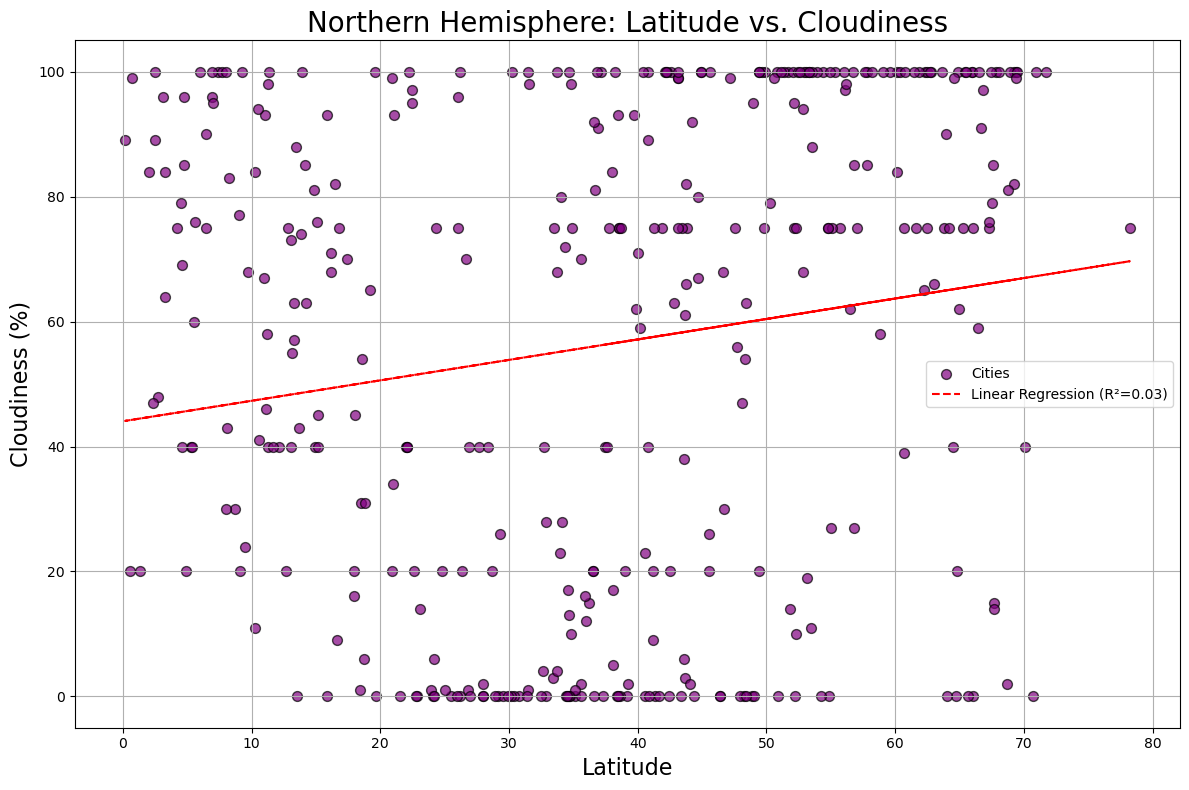

In [19]:
# Northern Hemisphere
# Perform and plot linear regression for Latitude vs. Cloudiness in the Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Northern Hemisphere: Latitude vs. Cloudiness', color='purple')

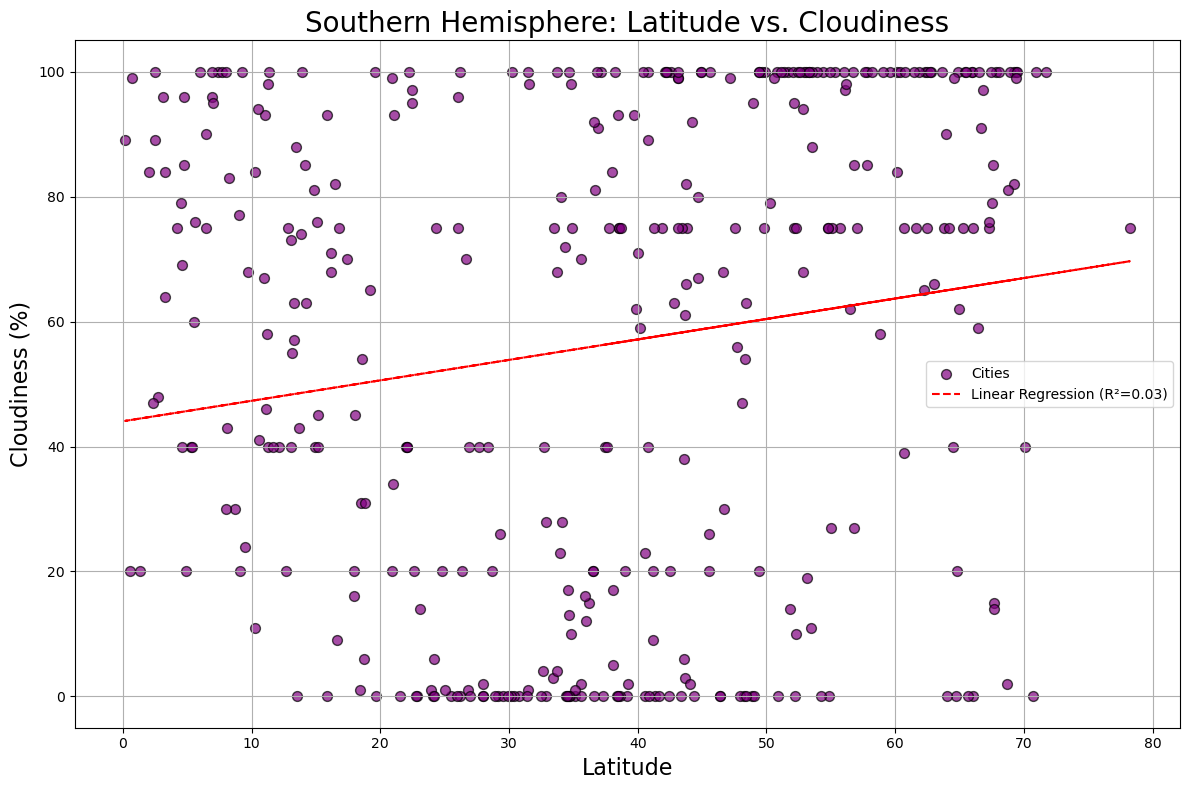

In [20]:
# Southern Hemisphere
# Perform and plot linear regression for Latitude vs. Cloudiness in the Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Southern Hemisphere: Latitude vs. Cloudiness', color='purple')

**Discussion about the linear relationship:
Cloudiness can be influenced by a variety of factors, including local geography (mountains, valleys, bodies of water), atmospheric conditions, and prevailing weather patterns.
Areas near the equator (low latitudes) often experience higher cloudines
A weak linear relationship between latitude and cloudiness in both the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

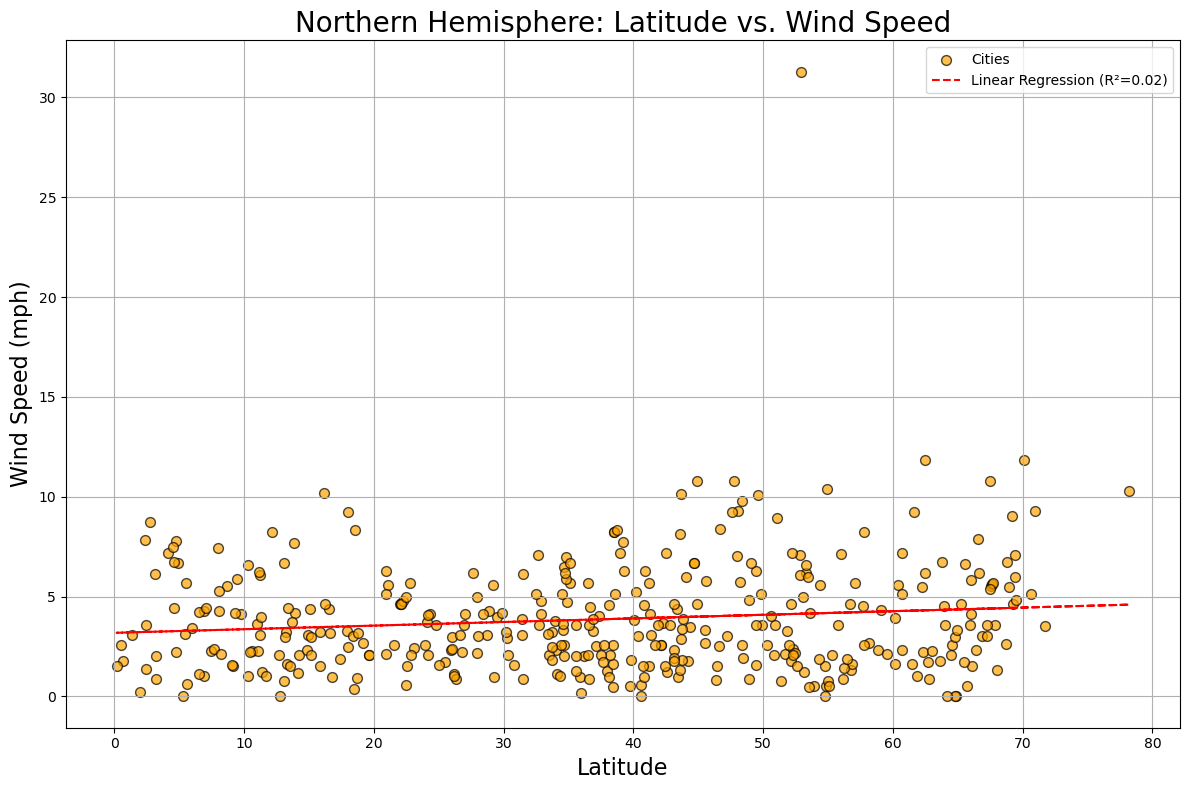

In [21]:
# Northern Hemisphere
# Perform and plot linear regression for Latitude vs. Wind Speed in the Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (mph)', 
                       'Northern Hemisphere: Latitude vs. Wind Speed', color='orange')

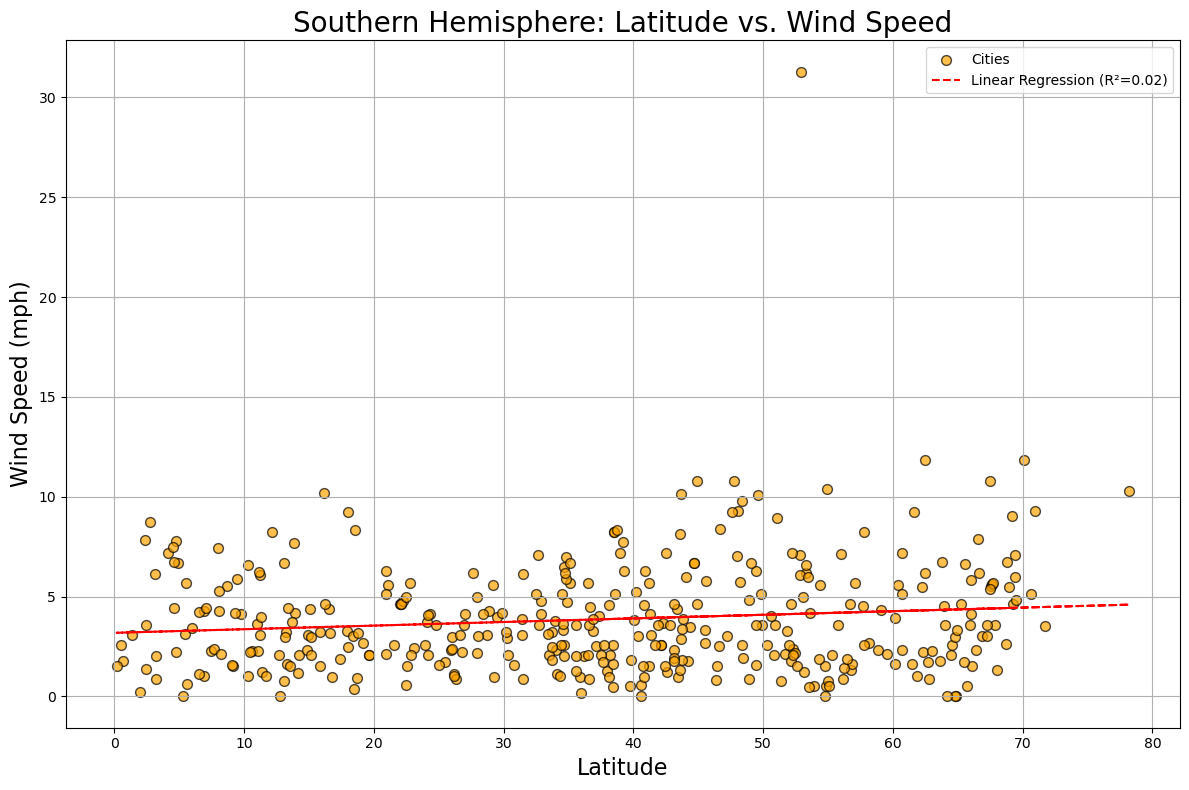

In [22]:
# Southern Hemisphere
# Perform and plot linear regression for Latitude vs. Wind Speed in the Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (mph)', 
                       'Southern Hemisphere: Latitude vs. Wind Speed', color='orange')